In [1]:
!ls

class.csv  sample_data		  test.csv  train.csv
drive	   sample_submission.csv  test.zip  train.zip


In [0]:
# !cp car_clf.h5 /content/drive/'My Drive'/'Colab Notebooks'/Projects/'Kaggle 3rd ML Car CLF'/Model_save/xception_1.h5

In [3]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

Archive:  train/train.zip
  inflating: train/train_00001.jpg   
  inflating: train/train_00002.jpg   
  inflating: train/train_00003.jpg   
  inflating: train/train_00004.jpg   
  inflating: train/train_00005.jpg   
  inflating: train/train_00006.jpg   
  inflating: train/train_00007.jpg   
  inflating: train/train_00008.jpg   
  inflating: train/train_00009.jpg   
  inflating: train/train_00010.jpg   
  inflating: train/train_00011.jpg   
  inflating: train/train_00012.jpg   
  inflating: train/train_00013.jpg   
  inflating: train/train_00014.jpg   
  inflating: train/train_00015.jpg   
  inflating: train/train_00016.jpg   
  inflating: train/train_00017.jpg   
  inflating: train/train_00018.jpg   
  inflating: train/train_00019.jpg   
  inflating: train/train_00020.jpg   
  inflating: train/train_00021.jpg   
  inflating: train/train_00022.jpg   
  inflating: train/train_00023.jpg   
  inflating: train/train_00024.jpg   
  inflating: train/train_00025.jpg   
  inflating: train/train

In [4]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras import models, layers 
from keras import callbacks
from keras.applications import Xception
import cv2
import time
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

Using TensorFlow backend.


In [5]:
!ls 

class.csv  sample_data		  test	    train
drive	   sample_submission.csv  test.csv  train.csv


In [0]:
# !rm -r /content/train_chop

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')

In [9]:
img.shape

(500, 700, 3)

In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chop """
  
  if f'{data_type}_chop' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chop')
  else:
    os.mkdir(f'{data_type}_chop')                                            # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image
    cv2.waitKey(0)
    
    crop_img = img[path_df.iloc[i, 2] : path_df.iloc[i, 4],     # y : y + h
                   path_df.iloc[i,1] : path_df.iloc[i, 3]]     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chop/{path_df.iloc[i,0]}', crop_img)  # save the image
    
    cv2.waitKey(0)

In [0]:
chop_img('train', train_df)

# After chop image

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
y = train_df['class']
x = train_df.drop('class', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [0]:
validation_set = pd.concat([X_test, y_test], axis=1)

In [17]:
print(train_df.shape)
print('-----------------')
print(train_set.shape)
print(validation_set.shape)

(9990, 6)
-----------------
(7992, 6)
(1998, 6)


In [18]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
2641,train_02642.jpg,65,23,601,393,31
237,train_00238.jpg,1,33,240,166,146
5195,train_05196.jpg,79,118,373,262,90
6581,train_06582.jpg,64,256,976,587,81
463,train_00464.jpg,168,172,877,592,3


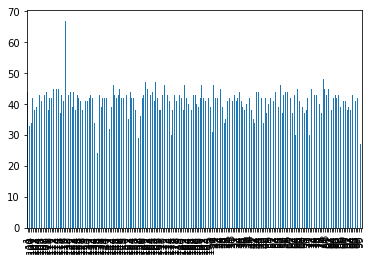

In [19]:
train_set['class'].value_counts().sort_index().plot(kind='bar')

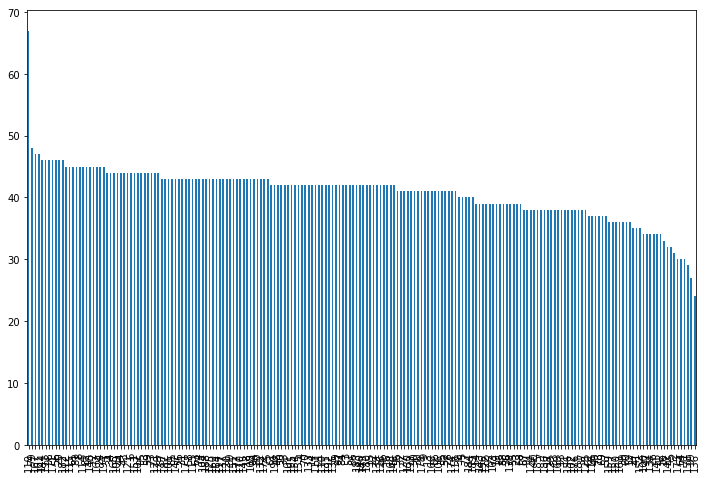

In [20]:
plt.figure(figsize=(12,8))
train_set['class'].value_counts().plot(kind='bar')

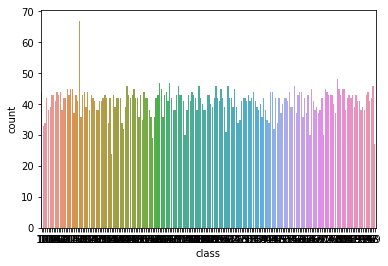

In [21]:
sns.countplot(train_set['class'])

In [22]:
train_set['class'].nunique()

196

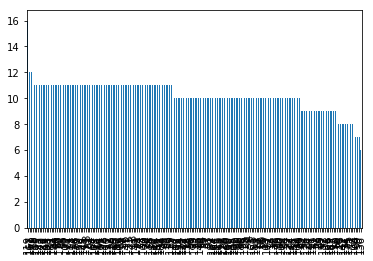

In [23]:
validation_set['class'].value_counts().plot(kind='bar')

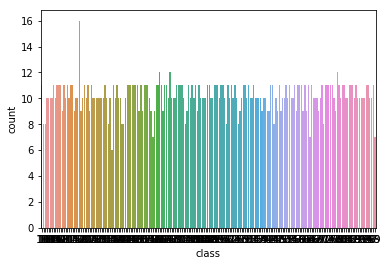

In [24]:
sns.countplot(validation_set['class'])

In [25]:
validation_set['class'].nunique()

196

Split Validation set  0.2 for Hold out set

In [26]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
1980,train_01981.jpg,41,85,618,408,154
788,train_00789.jpg,10,28,268,157,31
3973,train_03974.jpg,75,121,603,370,60
8672,train_08673.jpg,67,29,576,461,139
6070,train_06071.jpg,29,248,760,522,20


In [0]:
val_x = validation_set.drop('class', axis=1)
val_y = validation_set['class']

In [0]:
X_val, X_hol, y_val, y_hol = train_test_split(val_x, val_y, test_size= 0.2, stratify = val_y, random_state=42)

In [29]:
print(X_val.shape, y_val.shape)

(1598, 5) (1598,)


In [0]:
validation_set = pd.concat([X_val, y_val], axis=1)
hold_out_set = pd.concat([X_hol, y_hol], axis=1)

In [31]:
print(validation_set.shape)
print(hold_out_set.shape)

(1598, 6)
(400, 6)


In [32]:
print('validation : ', validation_set['class'].nunique())
print('hold_out : ', hold_out_set['class'].nunique())

validation :  196
hold_out :  196


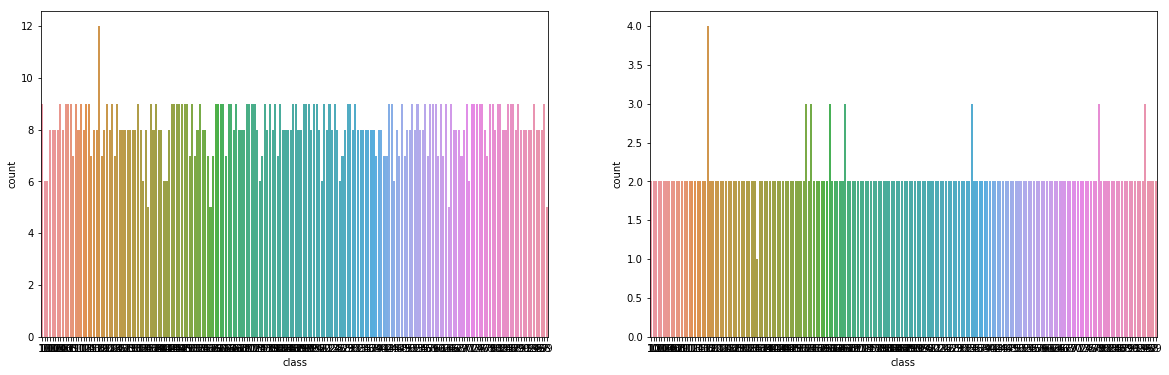

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('class', data = validation_set)

plt.subplot(1,2,2)
sns.countplot('class', data = hold_out_set)

Spliting Done

In [34]:
print('Training Set, "train_set" :', train_set.shape)
print('Validation Set, "validation_set" :', validation_set.shape)
print('Hold Out Set, "hold_out_set" :', hold_out_set.shape)

Training Set, "train_set" : (7992, 6)
Validation Set, "validation_set" : (1598, 6)
Hold Out Set, "hold_out_set" : (400, 6)


In [35]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
2641,train_02642.jpg,65,23,601,393,31
237,train_00238.jpg,1,33,240,166,146
5195,train_05196.jpg,79,118,373,262,90
6581,train_06582.jpg,64,256,976,587,81
463,train_00464.jpg,168,172,877,592,3


In [0]:
datagen = image.ImageDataGenerator(rescale=1./255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2, 
                                  rotation_range=20,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  shear_range=0.2)

validation_gen = image.ImageDataGenerator(rescale = 1./255)

holdout_gen = image.ImageDataGenerator(rescale = 1./255)

In [37]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(224,224), class_mode='categorical', batch_size=32, seed=42)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode='categorical', batch_size=32, seed=42)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode='categorical', batch_size=32, seed=42)

Found 7992 validated image filenames belonging to 196 classes.
Found 1598 validated image filenames belonging to 196 classes.
Found 400 validated image filenames belonging to 196 classes.


In [38]:
i = 0
for batch in train_data:
  img_array = batch[0]
  #print(img_array.shape)
  #print(img_array[i])
  for j in range(len(batch[0])):
    plt.figure(j)
    plt.imshow(img_array[j])
    
  i += 1
  if i % 5:
    break

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from keras.applications import MobileNetV2
from keras import models, layers
from keras.utils import plot_model
from keras import callbacks
from keras import optimizers

# 1) original

In [39]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

W0713 07:08:37.354630 139974958696320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 07:08:37.396237 139974958696320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 07:08:37.407971 139974958696320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 07:08:37.448638 139974958696320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 07:08:37.449928 1399749586

9412608/9406464 [==============================] - 0s 0us/step


In [40]:
mobilenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(196, activation='softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_2 (Dense)              (None, 196)               200900    
Total params: 3,770,628
Trainable params: 3,736,516
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net1.h5', monitor='val_loss', save_best_only=True)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.sgd(lr=0.01, momentum=0.65, nesterov=True)

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

W0713 07:09:17.554402 139974958696320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [46]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

W0713 07:09:18.908956 139974958696320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
249/249 [==============================] - 184s 739ms/step - loss: 4.8748 - acc: 0.0511 - val_loss: 4.0696 - val_acc: 0.1250
Epoch 2/100
249/249 [==============================] - 171s 686ms/step - loss: 3.1532 - acc: 0.2747 - val_loss: 3.0355 - val_acc: 0.2861
Epoch 3/100
249/249 [==============================] - 170s 684ms/step - loss: 1.9723 - acc: 0.4977 - val_loss: 2.5084 - val_acc: 0.3857
Epoch 4/100
249/249 [==============================] - 171s 685ms/step - loss: 1.3592 - acc: 0.6322 - val_loss: 2.4962 - val_acc: 0.3825
Epoch 5/100
249/249 [==============================] - 172s 689ms/step - loss: 1.0134 - acc: 0.7162 - val_loss: 2.2431 - val_acc: 0.4278
Epoch 6/100
249/249 [==============================] - 171s 685ms/step - loss: 0.8034 - acc: 0.7693 - val_loss: 1.3740 - val_acc: 0.6130
Epoch 7/100
249/249 [==============================] - 171s 687ms/step - loss: 0.6453 - acc: 0.8198 - val_loss: 1.8729 - val_acc: 0.5587
Epoch 8/100
249/249 [====================

In [47]:
model.evaluate_generator(valid_data, steps=valid_data.n//valid_data.batch_size)

[0.5488554264393802, 0.8825031923912798]

In [0]:
!cp /content/mobile_net1.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/model_save_0713/mobile_net1.h5

# 2)Add drop out between dense layers

In [0]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

In [50]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(196, activation='softmax'))

W0713 12:03:53.686579 139974958696320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               200900    
Total params: 3,770,628
Trainable params: 3,736,516
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net2.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.sgd(lr=0.01, momentum=0.65, nesterov=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

In [55]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

Epoch 1/100
249/249 [==============================] - 185s 742ms/step - loss: 5.1166 - acc: 0.0259 - val_loss: 4.5706 - val_acc: 0.0773

Epoch 00001: val_loss improved from inf to 4.57057, saving model to mobile_net2.h5
Epoch 2/100
249/249 [==============================] - 171s 688ms/step - loss: 4.0416 - acc: 0.1314 - val_loss: 3.7646 - val_acc: 0.1562

Epoch 00002: val_loss improved from 4.57057 to 3.76465, saving model to mobile_net2.h5
Epoch 3/100
249/249 [==============================] - 172s 691ms/step - loss: 2.9362 - acc: 0.2939 - val_loss: 3.7578 - val_acc: 0.1737

Epoch 00003: val_loss improved from 3.76465 to 3.75780, saving model to mobile_net2.h5
Epoch 4/100
249/249 [==============================] - 171s 687ms/step - loss: 2.1772 - acc: 0.4388 - val_loss: 2.4641 - val_acc: 0.4630

Epoch 00004: val_loss improved from 3.75780 to 2.46409, saving model to mobile_net2.h5
Epoch 5/100
249/249 [==============================] - 172s 692ms/step - loss: 1.6911 - acc: 0.5463 - va

KeyboardInterrupt: ignored

In [56]:
model.evaluate_generator(valid_data, steps=valid_data.n//valid_data.batch_size)

[0.5550099523740405, 0.8876117492239747]

In [0]:
!cp /content/mobile_net2.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/model_save_0713/mobile_net2.h5

# 3)Add Drop out layer  before dense layers

In [40]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

W0713 17:01:16.575526 139978806896512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 17:01:16.610433 139978806896512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 17:01:16.620580 139978806896512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 17:01:16.652335 139978806896512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 17:01:16.653118 1399788068

9412608/9406464 [==============================] - 2s 0us/step


In [41]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(196, activation='softmax'))

W0713 17:01:32.117522 139978806896512 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_2 (Dense)              (None, 196)               200900    
Total params: 3,770,628
Trainable params: 3,736,516
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net3.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.sgd(lr=0.01, momentum=0.65, nesterov=True)

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

W0713 17:01:32.207279 139978806896512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [46]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

W0713 17:01:32.382661 139978806896512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
249/249 [==============================] - 139s 560ms/step - loss: 5.2185 - acc: 0.0197 - val_loss: 4.8599 - val_acc: 0.0459

Epoch 00001: val_loss improved from inf to 4.85986, saving model to mobile_net3.h5
Epoch 2/100
249/249 [==============================] - 125s 502ms/step - loss: 4.3516 - acc: 0.0916 - val_loss: 4.1232 - val_acc: 0.0932

Epoch 00002: val_loss improved from 4.85986 to 4.12325, saving model to mobile_net3.h5
Epoch 3/100
249/249 [==============================] - 126s 504ms/step - loss: 3.1037 - acc: 0.2538 - val_loss: 3.6568 - val_acc: 0.1858

Epoch 00003: val_loss improved from 4.12325 to 3.65679, saving model to mobile_net3.h5
Epoch 4/100
249/249 [==============================] - 126s 506ms/step - loss: 2.2469 - acc: 0.4144 - val_loss: 2.8836 - val_acc: 0.3206

Epoch 00004: val_loss improved from 3.65679 to 2.88363, saving model to mobile_net3.h5
Epoch 5/100
249/249 [==============================] - 126s 505ms/step - loss: 1.7134 - acc: 0.5343 - va

In [0]:
model.evaluate_generator(valid_data, steps=32)

[0.514354920713231, 0.8984375]

In [0]:
model.evaluate_generator(holdout_data, steps=32)

[0.4420680062424752, 0.8961693548387096]

In [0]:
!cp /content/mobile_net3.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/model_save_0713/mobile_net3.h5

# 4) Add drop out between dense layers

In [0]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

In [0]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(196, activation='softmax'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               200900    
Total params: 3,770,628
Trainable params: 3,736,516
Non-trainable params: 34,112
_____________________________________________________________

In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net4.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.sgd(lr=0.01, momentum=0.65, nesterov=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

In [0]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

Epoch 1/100
249/249 [==============================] - 136s 547ms/step - loss: 5.3177 - acc: 0.0100 - val_loss: 5.1811 - val_acc: 0.0185

Epoch 00001: val_loss improved from inf to 5.18115, saving model to mobile_net4.h5
Epoch 2/100
249/249 [==============================] - 126s 506ms/step - loss: 5.0731 - acc: 0.0232 - val_loss: 5.0429 - val_acc: 0.0274

Epoch 00002: val_loss improved from 5.18115 to 5.04289, saving model to mobile_net4.h5
Epoch 3/100
249/249 [==============================] - 127s 509ms/step - loss: 4.5627 - acc: 0.0619 - val_loss: 4.3227 - val_acc: 0.1015

Epoch 00003: val_loss improved from 5.04289 to 4.32268, saving model to mobile_net4.h5
Epoch 4/100
249/249 [==============================] - 127s 508ms/step - loss: 3.7972 - acc: 0.1403 - val_loss: 3.9361 - val_acc: 0.1124

Epoch 00004: val_loss improved from 4.32268 to 3.93614, saving model to mobile_net4.h5
Epoch 5/100
249/249 [==============================] - 128s 513ms/step - loss: 3.0594 - acc: 0.2454 - va

In [0]:
!cp /content/mobile_net4.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Kaggle 3rd ML Car CLF'/model_save_0713/mobile_net4.h5

# 5) Try only softmax layer after GAP  to fill the flatten layer, add conv layer begore GAP

In [0]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

In [0]:
mobilenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.Conv2D(1280*2, (3,3), padding='same', activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(196, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 2560)        29493760  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               501956    
Total params: 32,253,700
Trainable params: 32,219,588
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net5.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.sgd(lr=0.01, momentum=0.65, nesterov=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

W0711 08:13:05.590020 140210238601088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

W0711 08:13:09.131280 140210238601088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
249/249 [==============================] - 200s 804ms/step - loss: 4.5321 - acc: 0.0840 - val_loss: 3.4917 - val_acc: 0.1709

Epoch 00001: val_loss improved from inf to 3.49173, saving model to mobile_net6.h5
Epoch 2/100
249/249 [==============================] - 184s 740ms/step - loss: 2.5037 - acc: 0.3665 - val_loss: 3.4827 - val_acc: 0.2535

Epoch 00002: val_loss improved from 3.49173 to 3.48270, saving model to mobile_net6.h5
Epoch 3/100
249/249 [==============================] - 186s 747ms/step - loss: 1.5861 - acc: 0.5679 - val_loss: 2.8223 - val_acc: 0.3646

Epoch 00003: val_loss improved from 3.48270 to 2.82230, saving model to mobile_net6.h5
Epoch 4/100
249/249 [==============================] - 184s 741ms/step - loss: 1.1395 - acc: 0.6744 - val_loss: 1.9796 - val_acc: 0.5089

Epoch 00004: val_loss improved from 2.82230 to 1.97960, saving model to mobile_net6.h5
Epoch 5/100
249/249 [==============================] - 183s 736ms/step - loss: 0.8709 - acc: 0.7460 - va

KeyboardInterrupt: ignored

# 6) Change optimizer to rmsprop

In [0]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

W0712 08:23:36.081686 140568659924864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 08:23:36.128302 140568659924864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 08:23:36.138295 140568659924864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 08:23:36.174603 140568659924864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 08:23:36.175800 1405686599

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(196, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_2 (Dense)              (None, 196)               200900    
Total params: 3,770,628
Trainable params: 3,736,516
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net6.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.rmsprop()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

W0712 08:24:02.671432 140568659924864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

W0712 08:24:12.052829 140568659924864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
249/249 [==============================] - 189s 758ms/step - loss: 5.2819 - acc: 0.0099 - val_loss: 11.7869 - val_acc: 0.0064

Epoch 00001: val_loss improved from inf to 11.78693, saving model to mobile_net6.h5
Epoch 2/100
249/249 [==============================] - 171s 687ms/step - loss: 4.8096 - acc: 0.0261 - val_loss: 8.2686 - val_acc: 0.0121

Epoch 00002: val_loss improved from 11.78693 to 8.26858, saving model to mobile_net6.h5
Epoch 3/100
249/249 [==============================] - 172s 692ms/step - loss: 4.0833 - acc: 0.0737 - val_loss: 12.7794 - val_acc: 0.0198

Epoch 00003: val_loss did not improve from 8.26858
Epoch 4/100
249/249 [==============================] - 172s 691ms/step - loss: 3.3857 - acc: 0.1621 - val_loss: 12.9108 - val_acc: 0.0204

Epoch 00004: val_loss did not improve from 8.26858
Epoch 5/100
249/249 [==============================] - 172s 692ms/step - loss: 2.9249 - acc: 0.2388 - val_loss: 14.2697 - val_acc: 0.0185

Epoch 00005: val_loss did not im

# 7) Dense layer as the same as conv channel

In [0]:
mobilenet = MobileNetV2(include_top=False, 
                       input_shape=(224,224,3))

In [0]:
model = models.Sequential()
model.add(mobilenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(196, activation='softmax'))

W0712 13:17:23.511062 140568659924864 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1280)              1639680   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               251076    
Total params: 4,148,740
Trainable params: 4,114,628
Non-trainable params: 34,112
_____________________________________________________________

In [0]:
check_point = callbacks.ModelCheckpoint('mobile_net7.h5', monitor='val_loss', save_best_only=True, verbose=1)

lr_changer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patientce=2, min_lr=1e-8, verbose=1)

In [0]:
my_opt = optimizers.rmsprop()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=my_opt, metrics=['acc'])

In [0]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=100, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

Epoch 1/100
249/249 [==============================] - 194s 778ms/step - loss: 5.3431 - acc: 0.0060 - val_loss: 5.2704 - val_acc: 0.0064

Epoch 00001: val_loss improved from inf to 5.27044, saving model to mobile_net7.h5
Epoch 2/100
249/249 [==============================] - 178s 715ms/step - loss: 5.2552 - acc: 0.0083 - val_loss: 10.5643 - val_acc: 0.0057

Epoch 00002: val_loss did not improve from 5.27044
Epoch 3/100
249/249 [==============================] - 176s 706ms/step - loss: 5.2108 - acc: 0.0119 - val_loss: 5.8441 - val_acc: 0.0051

Epoch 00003: val_loss did not improve from 5.27044
Epoch 4/100
249/249 [==============================] - 173s 696ms/step - loss: 5.1559 - acc: 0.0095 - val_loss: 9.5939 - val_acc: 0.0057

Epoch 00004: val_loss did not improve from 5.27044
Epoch 5/100
249/249 [==============================] - 175s 704ms/step - loss: 5.0683 - acc: 0.0139 - val_loss: 12.8262 - val_acc: 0.0064

Epoch 00005: val_loss did not improve from 5.27044
Epoch 6/100
249/249 [

In [0]:
model.fit_generator(train_data, steps_per_epoch=7992//32, epochs=30, validation_data=valid_data, validation_steps=1598//32, callbacks=[check_point, lr_changer])

Epoch 1/30
249/249 [==============================] - 180s 723ms/step - loss: 0.9790 - acc: 0.7011 - val_loss: 1.2343 - val_acc: 0.6756

Epoch 00001: val_loss did not improve from 1.18416
Epoch 2/30
249/249 [==============================] - 174s 700ms/step - loss: 0.9321 - acc: 0.7093 - val_loss: 1.2671 - val_acc: 0.6705

Epoch 00002: val_loss did not improve from 1.18416
Epoch 3/30
249/249 [==============================] - 174s 699ms/step - loss: 0.9495 - acc: 0.7095 - val_loss: 1.2786 - val_acc: 0.6639

Epoch 00003: val_loss did not improve from 1.18416
Epoch 4/30
249/249 [==============================] - 176s 708ms/step - loss: 0.9494 - acc: 0.7054 - val_loss: 1.3270 - val_acc: 0.6654

Epoch 00004: val_loss did not improve from 1.18416
Epoch 5/30
249/249 [==============================] - 175s 703ms/step - loss: 0.9342 - acc: 0.7076 - val_loss: 1.3807 - val_acc: 0.6469

Epoch 00005: val_loss did not improve from 1.18416
Epoch 6/30
249/249 [==============================] - 175s 7

KeyboardInterrupt: ignored